In [49]:
import numpy as np
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [67]:
x

array([ 5.5331143e-06, -1.1380684e-05, -7.8519388e-06, ...,
       -2.0815509e-03, -1.7469381e-03, -1.8701310e-03], dtype=float32)

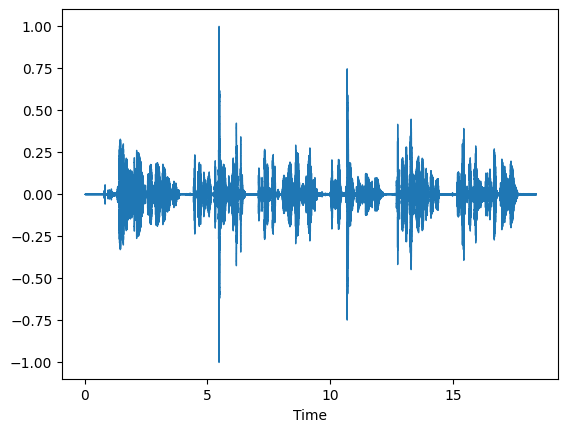

In [66]:
import librosa
# Load your voice (WAV file)
x, sr = librosa.load('harvard.wav')
# Create a voice picture
librosa.display.waveshow(x, sr=sr)


In [52]:
sr

22050

In [53]:
# Set pre-emphasis coefficient (α)
alpha = 0.97

# Apply pre-emphasis to the audio signal
x_preemph = np.append(x[0], x[1:] - alpha * x[:-1])

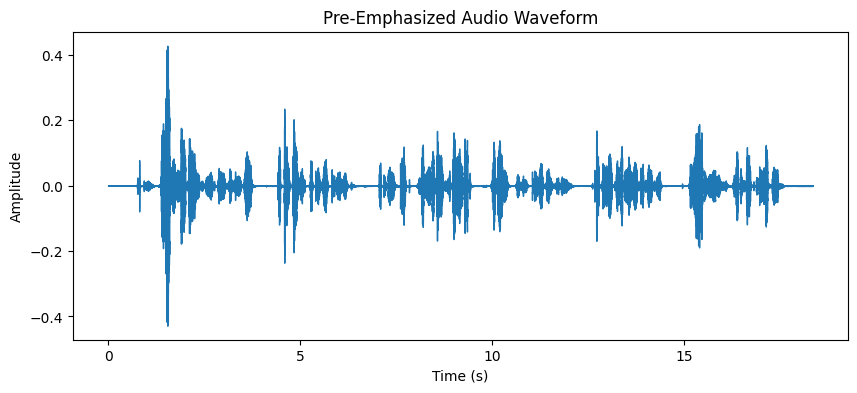

In [54]:
# Plot the pre-emphasized waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(x_preemph, sr=sr)
plt.title("Pre-Emphasized Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.show()

In [55]:
# Parameters for framing
frame_size = 0.025  # 25ms
hop_size = 0.01     # 10ms
frame_length = int(sr * frame_size)  # Number of samples per frame
hop_length = int(sr * hop_size)      # Hop length (overlap by design)

In [56]:
# Create frames using librosa's utility
frames = librosa.util.frame(x_preemph, frame_length=frame_length, hop_length=hop_length).T
print(f"Number of frames: {frames.shape[0]}, Frame length: {frames.shape[1]}")

Number of frames: 1838, Frame length: 551


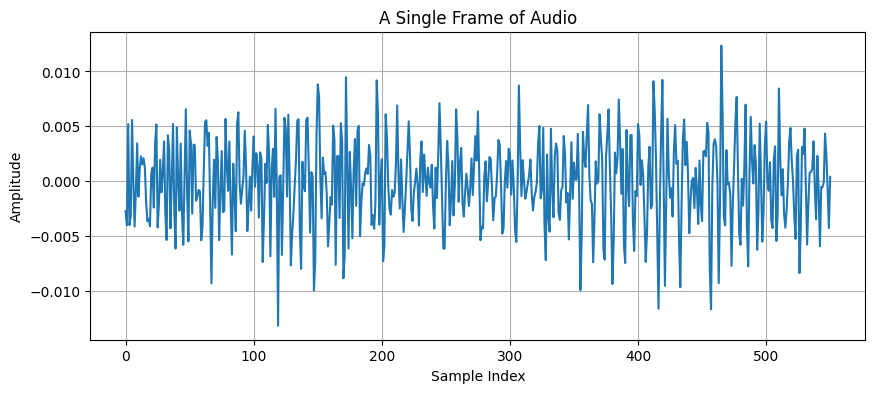

In [57]:
# Plot one frame
plt.figure(figsize=(10, 4))
plt.plot(frames[100])  # Plot the 100th frame as an example
plt.title("A Single Frame of Audio")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

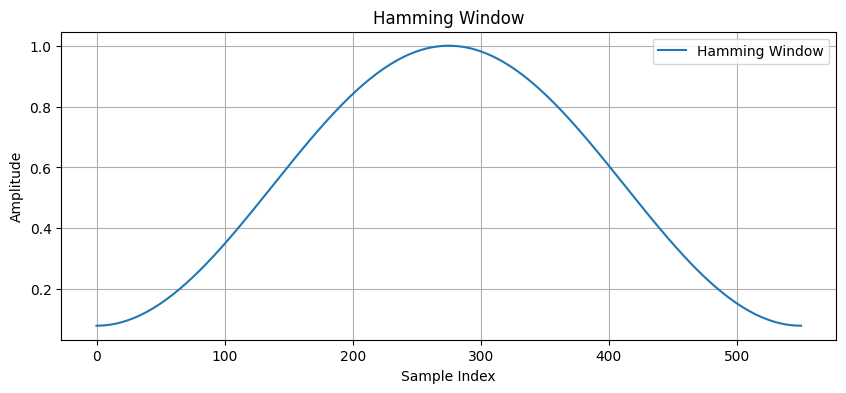

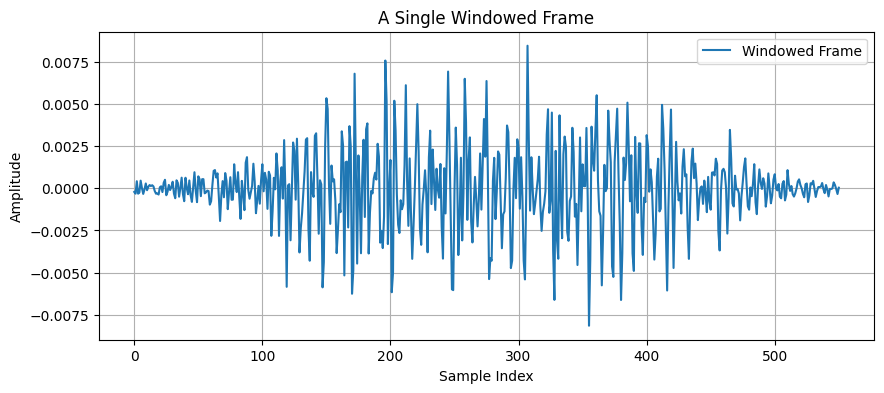

In [58]:
# Apply Hamming window
window = np.hamming(frame_length)  # Generate Hamming window
windowed_frames = frames * window

# Plot the Hamming window
plt.figure(figsize=(10, 4))
plt.plot(window, label="Hamming Window")
plt.title("Hamming Window")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

# Plot a windowed frame
plt.figure(figsize=(10, 4))
plt.plot(windowed_frames[100], label="Windowed Frame")  # Example frame
plt.title("A Single Windowed Frame")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


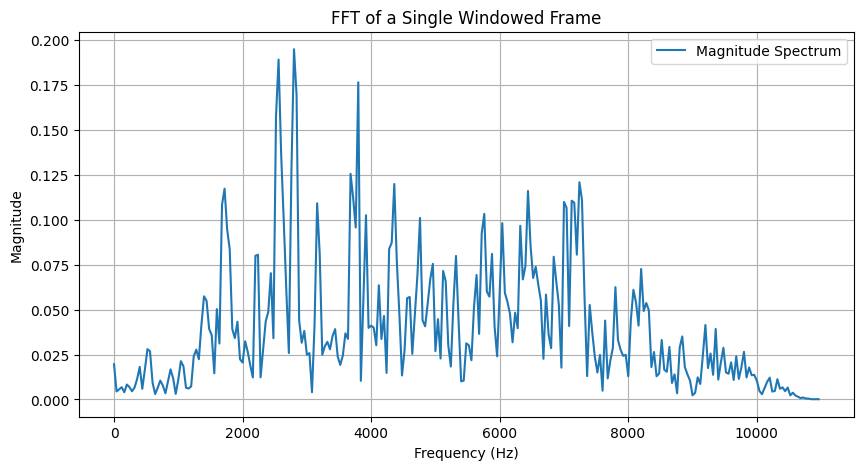

In [59]:
# Perform FFT on one of the windowed frames (example: 100th frame)
fft_frame = np.fft.fft(windowed_frames[100]) # convert the time-domain signal (frame) into the frequency-domain
fft_magnitude = np.abs(fft_frame)  # Take magnitude (ignoring phase)
freqs = np.fft.fftfreq(len(fft_frame), 1/sr)  # Generate frequency axis

# Only keep positive frequencies (real signals are symmetric in FFT)
positive_freqs = freqs[:len(freqs)//2]
positive_magnitude = fft_magnitude[:len(freqs)//2]

# Plot the FFT result
plt.figure(figsize=(10, 5))
plt.plot(positive_freqs, positive_magnitude, label="Magnitude Spectrum")
plt.title("FFT of a Single Windowed Frame")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.legend()
plt.show()

In [60]:
n_fft= len(fft_frame)
n_mels = 40

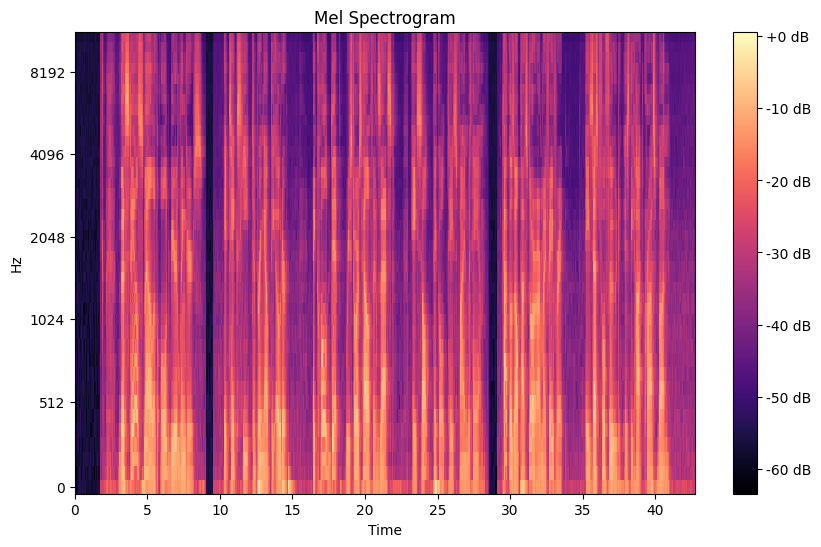

In [61]:

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)

# Compute the magnitude spectrogram (ignoring the phase)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Compute the Mel filterbank
mel_filters = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

# Apply the Mel filterbank to the magnitude spectrogram
mel_spectrum = np.dot(mel_filters, np.abs(D))

# Plot the Mel spectrogram using librosa's specshow
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.power_to_db(mel_spectrum), x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.show()

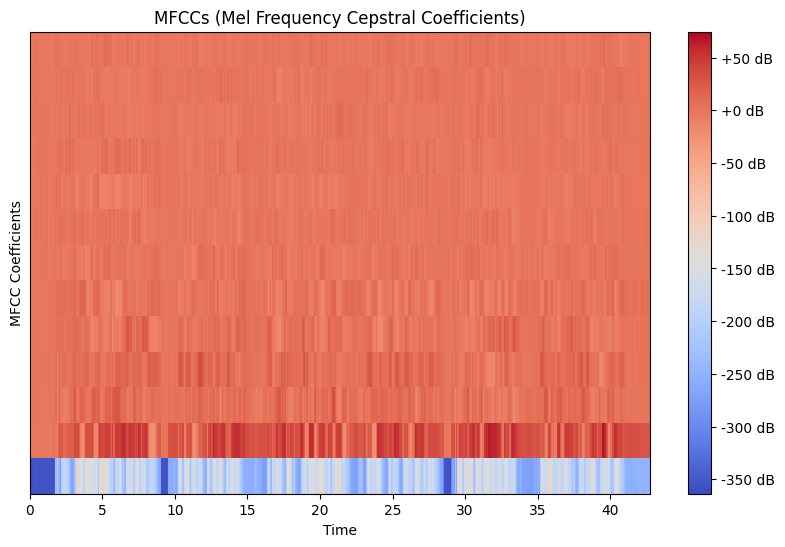

In [62]:
# Compute MFCCs (Mel Frequency Cepstral Coefficients)
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel_spectrum), sr=sr, n_mfcc=13)

# Plot the MFCCs using librosa's specshow
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title("MFCCs (Mel Frequency Cepstral Coefficients)")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()